## Чтение из файлов и рисование траекторий

In [8]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..', 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)

import summary
summary.widget()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
summary.print_info(['Freq', 'xmi2', 'inew'])


                   Freq_0.8.zip                   
 ================= ASTRA summary =================
 Astra folder  D:\cygwin64\home\tmp8\ASTRA-6\a4   
 exp file      40167_01.exp                       
 equ file      40167_01.equ                       
 Computer name  Zen5                              
 ============= Ray tracing parameters =============
 Freq:  0.8 (GHz)                                 
 xmi2:  16.0 (Mi2/Mp)                             
 inew:  1 (int)                                   


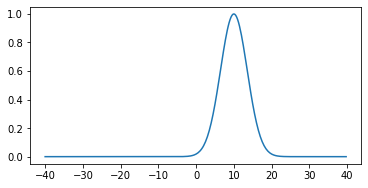

In [9]:
from race import Race 
R1 = Race(summary.selected_races[0])
R1.plot_spectrum()

100
lhcd/out/traj.1800734705943335.dat


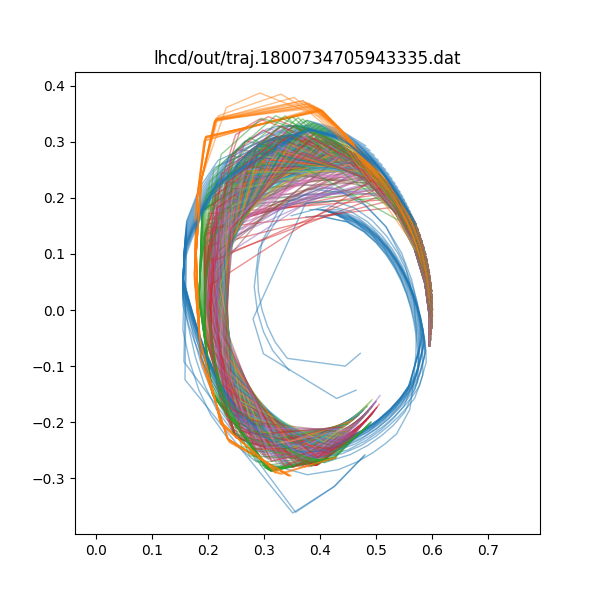

In [10]:
from race import Race 
R1 = Race(summary.selected_races[0])
print(len(R1.traj_list))
print(R1.traj_list[0])
%matplotlib widget
R1.plot_trajectories(R1.traj_list[0])

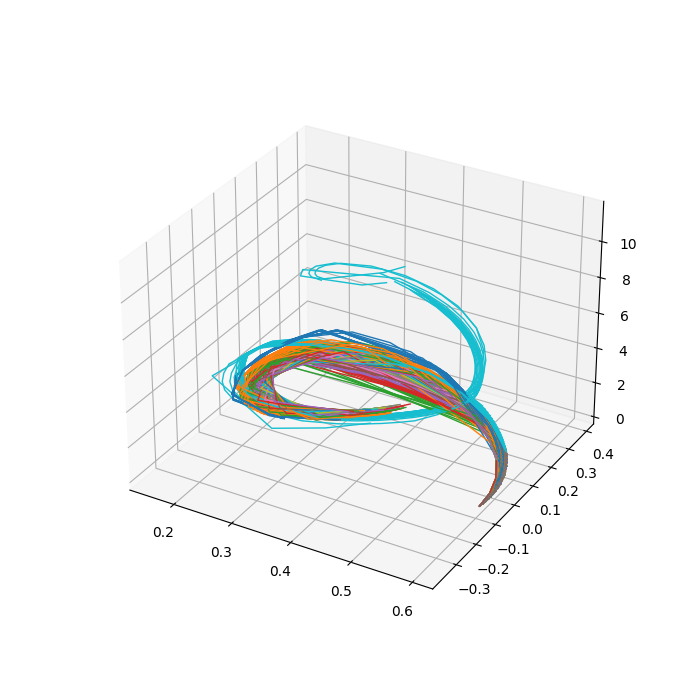

In [11]:
import matplotlib.pyplot as plt
from ipywidgets import interactive
rays, max_N_traj = R1.read_trajectories(R1.traj_list[0])
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, len(rays)):
        ray = rays[i]
        ax.plot(ray['R'], ray['Z'],ray['theta'], alpha=1.0, linewidth=1)
        #ax.set_zlim(0.0, 4.5)

In [12]:
import matplotlib.pyplot as plt
from ipywidgets import interactive
rays, max_N_traj = R1.read_trajectories(R1.traj_list[0])
#print(rays[0].keys())
#print(rays[0]['rho'])
#print(rays[0]['theta'])

In [13]:


def plot_func(index, k):
    plt.figure(figsize=(5,5))
   # plt.plot(R, Z)
    end_index = index+k if (index+k)<len(rays) else len(rays)
    for i in range(index, end_index):
        ray = rays[i]
        #plt.plot(ray['R'], ray['Z'], alpha=1.0, linewidth=1)  
        plt.plot(ray['R'], ray['theta'], alpha=1.0, linewidth=1)  
    #plt.xlim(0.12, 0.62)
    #plt.ylim(-0.5, 0.5)
    plt.show()
 
w = interactive(plot_func, index = (1, len(rays)), k = (1, len(rays)))
w

interactive(children=(IntSlider(value=525, description='index', max=1050, min=1), IntSlider(value=525, descrip…